In [ ]:
import json
import ast
import matplotlib.pyplot as plt
from collections import Counter
from concurrent.futures import ThreadPoolExecutor
from shared import generate

### **Identify and Explain Issue**

In [ ]:
def identify_explain_indirect(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 2 responds to speaker 1. Decide who is at fault for the communication breakdown observed, Speaker 1, Speaker 2 or both? Explain your decision. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "fault":"Speaker #", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_explain_indirect(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/identify_explain_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/identify_explain_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'fault': 'Speaker 2',
  'explanation': 'Speaker 2 is at fault because they failed to provide the necessary information about the new deadline. Although Speaker 1 inquired specifically about the new deadline, Speaker 2 only confirmed their own awareness without sharing the information that was asked for. This lack of detail hindered the effective communication of the needed details.'},
 {'fault': 'Speaker 2',
  'explanation': "Speaker 2 is primarily at fault for the communication breakdown. While Speaker 1's question was clear and precise, asking for the location of the files, Speaker 2's response did not provide the requested information. Instead, Speaker 2 only confirmed their ability to provide the information ('Yes, I can') without actually doing so. This lack of a direct and complete response led to the breakdown in communication."}]

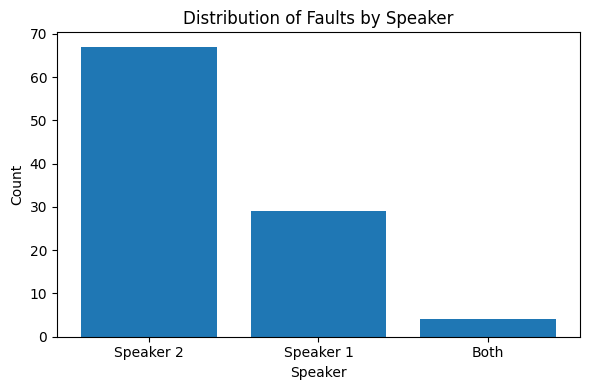

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['fault'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Both")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Faults by Speaker")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### **Feedback on How Communication Can be Improved**

In [ ]:
def provide_feedback(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nIn the dialogue above, Speaker 1 uses an indirect speech act and Speaker 2 responds to it literally. As a communication expert, what feedback would you provide to the speaker(s)? One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "feedback":"Your feedback, if any."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated = json.load(f)
    
indirect_statements_generated[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = provide_feedback(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(10)))


In [ ]:
with open('indirect_analysis_data/provide_feedback_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/provide_feedback_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:10]


[{'feedback': "Speaker 1, it's helpful to be direct and explicit about your questions to avoid any misunderstandings. For example, you could ask, 'Can you tell me what the new deadline is?' Speaker 2, your response provides confirmation, which is good, but offering the specific information would be more helpful. For example, you could say, 'Yes, the new deadline is [date].'"},
 {'feedback': "For Speaker 1: You asked an indirect question, which might be confusing for someone interpreting language literally. Try to be more direct by asking 'Where are the files saved?' For Speaker 2: Your literal response indicates the potential for further clarification. You could add more information like 'Yes, I can tell you. The files are saved in [location].'"},
 {'feedback': "Speaker 1's question about the project is indirect and might require more specificity for clarity. Since Speaker 2 responded literally, it can be beneficial for Speaker 1 to follow up with more direct questions or statements to

### **Identify Autistic Speaker**


In [ ]:
def identify_autistic_speaker(dialogue):
  return generate(model = 'gpt-4o',
        system = 'Analyze the dialogue as specified below.',
        query = dialogue + '\n\nBased on the dialogue above, can you identify which speaker is autistic: Speaker 1, Speaker 2 or neither? Explain your decision. One of the two speakers is autistic. You must output a dictionary formatted exactly as follows with no extra tags or text: { "autistic":"Speaker # or neither", "explanation":"A detailed explanation for your decision."}',
        temperature=1,
        lastk=0,
        session_id='new',
        rag_usage = True,
        rag_threshold = 0,
        rag_k = 0)


In [ ]:
with open('indirect_generated_data/indirect.json') as f:
    indirect_statements_generated_workplace = json.load(f)
    
indirect_statements_generated_workplace[0:2]


[{'Speaker 1': 'Are you aware of what the new deadline is?',
  'Speaker 2': 'Yes, I know about the deadline.'},
 {'Speaker 1': 'Can you tell me where the files are saved?',
  'Speaker 2': 'Yes, I can.'}]

In [ ]:
def process_dialogue(i):
    dialogue = '\n'.join([f"{speaker}: {statement}" for speaker, statement in indirect_statements_generated[i].items()])
    response = identify_autistic_speaker(dialogue)['response']
    return ast.literal_eval(response)

with ThreadPoolExecutor(max_workers=10) as executor:
    results = list(executor.map(process_dialogue, range(100)))


In [ ]:
with open('indirect_analysis_data/autistic_speaker_ctx_autism.json', 'w') as f:
    json.dump(results, f, indent=2)


In [ ]:
with open('indirect_analysis_data/autistic_speaker_ctx_autism.json') as f:
    results_loaded = json.load(f)

results_loaded[0:2]


[{'autistic': 'Speaker 2',
  'explanation': "Speaker 2's response is very straightforward and literal, which can sometimes be indicative of autistic communication styles. They simply acknowledge the information without elaboration or additional context, which is a characteristic of how some autistic individuals might communicate. Speaker 1's question does not show any specific traits that could help identify them as autistic."},
 {'autistic': 'Speaker 2',
  'explanation': "Speaker 2's response is straightforward and literal, without inferring the implied request for the actual location of the files. Autistic individuals can sometimes have a more literal understanding of language. Speaker 1 asks where the files are saved, implying a request for the location, but Speaker 2 only confirms their ability to tell, rather than providing the location. This can indicate a more literal interpretation of the question, which is a characteristic sometimes associated with autism."}]

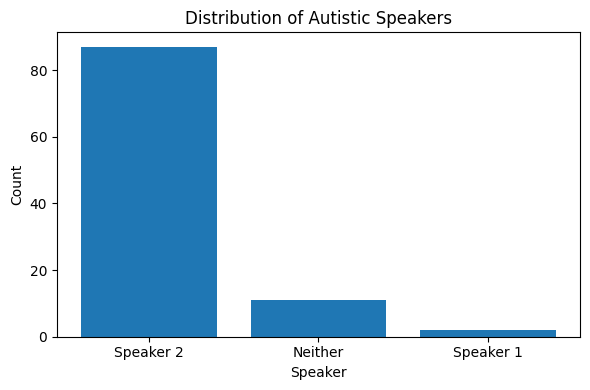

In [ ]:
normalized_faults = []
for r in results_loaded:
    fault = r['autistic'].strip().lower()
    if "1" in fault:
        normalized_faults.append("Speaker 1")
    elif "2" in fault:
        normalized_faults.append("Speaker 2")
    else:
        normalized_faults.append("Neither")

# Count occurrences
fault_counts = Counter(normalized_faults)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fault_counts.keys(), fault_counts.values())
plt.title("Distribution of Autistic Speakers")
plt.xlabel("Speaker")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
